In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define transformations for the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3409943.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 160179.43it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1481508.36it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1847951.19it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # 1st conv layer
        x = self.pool(torch.relu(self.conv2(x)))  # 2nd conv layer
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))               # 1st fully connected layer
        x = torch.relu(self.fc2(x))               # 2nd fully connected layer
        x = self.fc3(x)                           # Output layer
        return x

In [4]:
# Instantiate the network
net = SimpleCNN()

# Hook to store intermediate activations
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# Register hooks for each layer you want to visualize
net.conv1.register_forward_hook(get_activation('conv1'))
net.conv2.register_forward_hook(get_activation('conv2'))

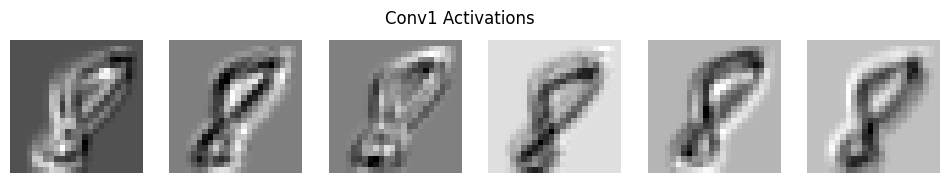

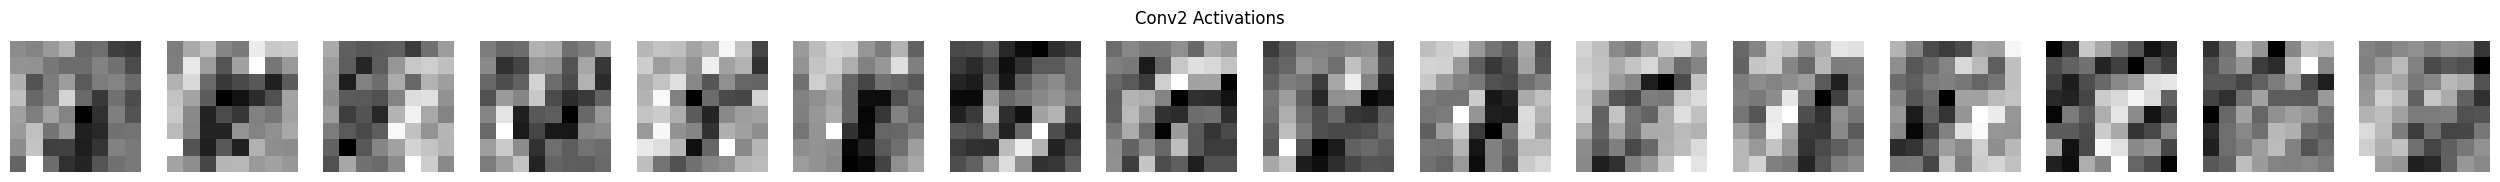

In [6]:
# Visualizing function
def visualize_activation(activation, title):
    act = activation.squeeze().cpu().numpy()
    num_filters = act.shape[0]
    fig, axs = plt.subplots(1, num_filters, figsize=(num_filters * 2, 2))

    for i in range(num_filters):
        axs[i].imshow(act[i], cmap='gray')
        axs[i].axis('off')
    fig.suptitle(title)
    plt.show()

# Load an image from the MNIST dataset
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Forward pass through the network
outputs = net(images)

# Visualize the activations of each layer
visualize_activation(activations['conv1'], 'Conv1 Activations')
visualize_activation(activations['conv2'], 'Conv2 Activations')

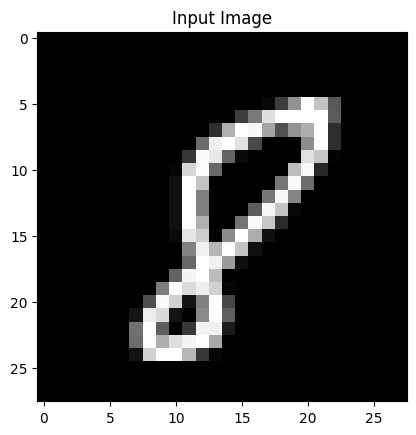

In [7]:
# Optional: visualize the input image
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title("Input Image")
plt.show()